# Preliminary Data Analysis

Here we are going to show how cycling has change over the period **2009-2017** by relying on data collected from [Strava](http://www.strava.com). 

We are going to show __*(i)* evolution in trend of km ridden by users over years__ and, also, we will show __*(ii)* the number of training sessions (efforts) per segment, geolocated on a map so as to define a preliminary spatial correlation__ between users' efforts and segments where the corresponding trainings took place.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import math
import seaborn as sns
plt.style.use('seaborn-poster')
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## Data Loading and preprocessing

In [25]:
segments = pd.read_csv("../dataset/segments-italy-PREPROCESSED.csv")

In [26]:
segments.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,avg_grade,climb_category,climb_category_desc,distance,elev_difference,id,name,points,resource_state,starred,s_lat,s_lng,e_lat,e_lng,country_code,loc_name
0,0,14,9802256,5.0,2,3,5047.5,253.6,9802256,salita di nikkà completa - dal mare alla chies...,{_h_Fg|chANIJOPy@Is@pEeHz@sA^e@R_@Lg@R}ALYl@a@...,2,False,36.746387,11.985483,36.740153,12.019223,it,Pantelleria



Let's see how segments are divided by climbing category: from **1 easiest (hill)** to **5 toughest (alpine climb)**.

In [27]:
segments["climb_category"].value_counts()

1    4045
2    1560
3     564
4      50
5      39
Name: climb_category, dtype: int64


See if any duplicate is present: it should not be the case.


In [28]:
counts = segments["id"].value_counts()
(counts > 1).any()

False

In [29]:
activities = pd.read_csv("../dataset/activities-italy-PREPROCESSED.csv")

In [8]:
activities.head(1)

,athlete_name,elapsed_time,moving_time,rank,start_date,start_date_local,segment,Year,Month,Day,...,elev_difference,name,resource_state,starred,s_lat,s_lng,e_lat,e_lng,country_code,loc_name
0,Gaspare S.,818,818,1,2016-09-20 15:18:50,2016-09-20T17:18:50Z,9802256,2016,9,20,...,253.6,salita di nikkà completa - dal mare alla chies...,2,False,36.746387,11.985483,36.740153,12.019223,it,Pantelleria



Now we going to consider only training sessions (activities) made in the period **2009 - 2017**.

In [30]:
activities_filtered = activities[np.logical_and(activities["Year"] >= 2009, activities["Year"] <= 2017)]

In [31]:
activities_filtered.head()

,athlete_name,elapsed_time,moving_time,rank,start_date,start_date_local,segment,Year,Month,Day,...,elev_difference,name,resource_state,starred,s_lat,s_lng,e_lat,e_lng,country_code,loc_name
0,Gaspare S.,818,818,1,2016-09-20 15:18:50,2016-09-20T17:18:50Z,9802256,2016,9,20,...,253.6,salita di nikkà completa - dal mare alla chies...,2,False,36.746387,11.985483,36.740153,12.019223,it,Pantelleria
1,Vincenzo R.,921,921,2,2015-06-08 06:51:53,2015-06-08T08:51:53Z,9802256,2015,6,8,...,253.6,salita di nikkà completa - dal mare alla chies...,2,False,36.746387,11.985483,36.740153,12.019223,it,Pantelleria
2,Simone P.,985,985,3,2014-11-18 13:37:08,2014-11-18T14:37:08Z,9802256,2014,11,18,...,253.6,salita di nikkà completa - dal mare alla chies...,2,False,36.746387,11.985483,36.740153,12.019223,it,Pantelleria
3,Costantino M.,1010,1010,4,2014-07-12 07:36:24,2014-07-12T09:36:24Z,9802256,2014,7,12,...,253.6,salita di nikkà completa - dal mare alla chies...,2,False,36.746387,11.985483,36.740153,12.019223,it,Pantelleria
4,Alessandro C.,1037,1009,5,2015-08-08 06:41:30,2015-08-08T08:41:30Z,9802256,2015,8,8,...,253.6,salita di nikkà completa - dal mare alla chies...,2,False,36.746387,11.985483,36.740153,12.019223,it,Pantelleria


In [32]:
activities_filtered.to_csv(path_or_buf="../dataset/strava_training_sessions_italy_2009-2017-FINAL.csv")

In [10]:
assert activities_filtered.shape[0] <= activities.shape[0] 

In [11]:
total_km_ridden = activities_filtered["distance"].sum() / 1000
print ("Total # of Km ridden from 2009 to 2017: {:.2f}".format(total_km_ridden))

Total # of Km ridden from 2009 to 2017: 9523346.74



We now perform a preliminary grouping so as to know exactly how many efforts were made __each year__ on __each segment__.

In [12]:
activities_by_segment_year = activities_filtered.groupby(["Year", "segment"])["rank"].count()

In [13]:
total_efforts_per_year = activities_by_segment_year.sum(level="Year")
total_efforts_per_year

Year
2009       4738
2010      10805
2011      26342
2012      67707
2013     155491
2014     311483
2015     586344
2016     941770
2017    1410505
Name: rank, dtype: int64

## Trend: Distance Traveled over Years

Let's find now How much Strava's users have ridden each year (distance is expressed in meters):

In [14]:
distance_by_year = activities_filtered.groupby(["Year"])["distance"].sum()
distance_by_year

Year
2009    1.256891e+07
2010    2.852067e+07
2011    7.026328e+07
2012    1.826590e+08
2013    4.229606e+08
2014    8.442034e+08
2015    1.579004e+09
2016    2.551274e+09
2017    3.831893e+09
Name: distance, dtype: float64

Separating now recent years from early ones (2009-2016) just for the sake of a better visualization. Also, we going to use km as unit.

In [15]:
latest_years = distance_by_year.loc[range(2015, 2018)] / 1000
latest_years_annot = distance_by_year.loc[[2015, 2017]] / 1000
early_years = distance_by_year.loc[range(2009, 2016)] / 1000
early_years_annot = distance_by_year.loc[[2009]] / 1000

Let's get to the job of preparing and the actual plotting. 

In [16]:
def plot_distance_by_year():
    def millions_ticks(x, pos):
        'The two args are the value and tick position'
        if (x == 0):
            return "0"
        if (x % 2000000 == 0):
            return "{:6,.0f} km".format(x)
        return ""
    formatter = ticker.FuncFormatter(millions_ticks)

    fig = plt.figure(figsize=(11,7))
    ax = plt. axes()
    ax.plot(early_years.index.values, early_years.values, "-", color='darkgray')
    ax.plot(latest_years.index.values, latest_years.values, "-", color='darkblue')
    ax.plot(latest_years_annot.index.values, latest_years_annot.values, "o", color='darkblue')
    ax.plot(early_years_annot.index.values, early_years_annot.values, "o", color='darkgray')

    ax.text(2008.5, 150000, "{:2,.2f} km".format(distance_by_year.loc[[2009]].values[0] / 1000), fontsize=18, color="darkgray")
    ax.text(2012, 1500000, "{:6,.2f} km".format(distance_by_year.loc[[2015]].values[0] / 1000), fontsize=18, color="darkblue")
    ax.text(2015.5, 4000000, "{:6,.2f} km".format(distance_by_year.loc[[2017]].values[0] / 1000), fontsize=18, color="darkblue")

    years_range = np.arange(2008, 2020)
    plt.xticks(years_range, ("", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", ""))

    ax.yaxis.set_major_formatter(formatter)
    plt.ylim(-10000, 4500000)

    plt.title("Distance Traveled over Years on the Downloaded Strava Segments ", color="gray", fontsize=18, y=1.08)
    ax.set(xlabel="Year", ylabel="Distance")

    ax.tick_params(axis='y', colors='gray')
    ax.tick_params(axis='x', colors='gray')

    ax.yaxis.label.set_color('gray')
    ax.yaxis.label.set_position((0, 0.9))
    ax.xaxis.label.set_position((0.09, 0))
    ax.xaxis.label.set_color('gray')
    ax.grid(False)

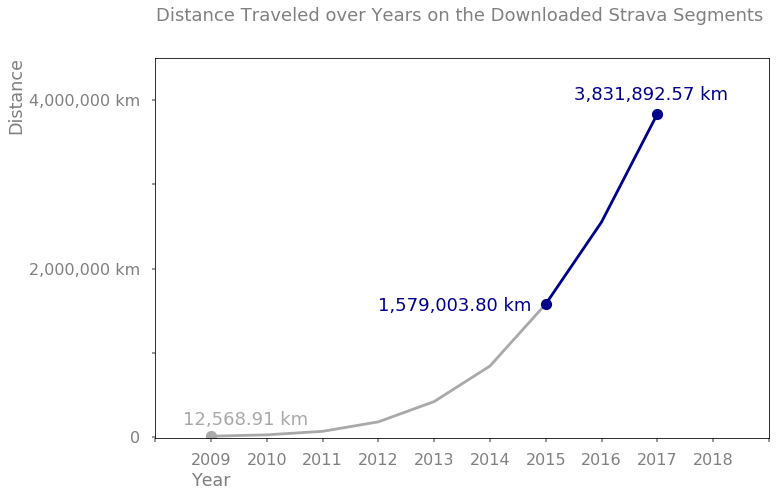

In [17]:
plot_distance_by_year()

As we can see, the growth has been exponential: in particular, focusing on the most recent years (2015-2017), the number of kilometers traveled
doubled from  1.5 millions to almost 4 millions of kilometer.

Of course, we are aware that this exponential trend can suffer from a *"technological bias"* caused by an increased availability of gps-enabled devices (bike computers, smartphone)
that have made it possible to integrate sport activities with online service such as Strava. In other words, while in 2009 the number of such devices was low, the availability has been with no doubt much larger in 2015-2017, 
leading to a possible *technological bias* in the figures. However, even though the number and the availability of such devices in 2009 may have been quite low,
starting from 2015, we have witnessed a relative large diffusion and availability of Internet-enabled devices, so that we can assume no "technological bias" affecting the data from 2015 on.

A better measure would have been the *distance per year normalized* by the *total number of users* registered to the platform on a given year: unfortunately Strava does not disclose this information.

## Geolocated Number of Training Sessions 

Next, we are showing the number of training sessions (efforts) per segment, geolocated on a map so as to define a preliminary spatial correlation between users' efforts and segments where the corresponding trainings took place.

In [18]:
def get_segments_effort_for_years(year):
    segments_y = activities_by_segment_year[year,]
    segments_df_y = pd.DataFrame({"count": segments_y})
    segments_df_y = pd.merge(segments_df_y, activities_filtered[["segment", "s_lat", "s_lng", "climb_category"]], left_index=True, right_on="segment")
    segments_df_y = segments_df_y.drop_duplicates(subset=["segment"])
    return segments_df_y

In [19]:
years = [y for y in range(2009, 2018)]

def collect_segments_for_years(years_list):
    segments_years = {}
    for y in years_list:
        segments_years[y] = get_segments_effort_for_years(y)
    return segments_years

For each reference year from 2009 to 2017 collect the number of efforts per segment:

In [20]:
efforts_segments_years = collect_segments_for_years(years)

Now for better visualization purpose, for each year we are going to collect the segments added during the course of that year and those instead already present in previous years: we going to show these with a different color on map

In [21]:
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
sns.set()


def plot_multimap(years, dataframe, legend_index=1):
    fig = plt.figure(figsize=(14, 14))
    
    min_max = []
    for yr in years:
        min_max.append(dataframe[yr]["count"].min())
        min_max.append(dataframe[yr]["count"].max())
    min_max = np.array(min_max)
    min_efforts, max_efforts = min_max.min(), min_max.max() 

    for i, yr in enumerate(years):      
        ax1 = fig.add_subplot(221 + i)
        ax1.set_title(str(yr))
        m = Basemap(llcrnrlon=6.37,llcrnrlat=36.48333333,urcrnrlon=21.5,urcrnrlat=46.7, epsg=5520)
        m.shadedrelief()
        m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500)
        
        #m.contourf(x, y, Z, levels=np.linspace(0, Z.max(), 25), cmap=cmaps[0])                                       
        #sizes = dataframe[y]["count"].values / 10
        x, y = m(dataframe[yr]["s_lng"].values, dataframe[yr]["s_lat"].values)

        sc = m.scatter(x, y, s=10, c=dataframe[yr]["count"].values, 
                       norm=colors.LogNorm(vmin=min_efforts, vmax=max_efforts), alpha=0.9, marker=".")
        #m.scatter(x, y, alpha=0.3, s=dataframe[yr]["count"].values / 10, color="blue")
        if i == legend_index:
            cbaxes = fig.add_axes([0.9, 0.58, 0.02, 0.3]) 
            cb = fig.colorbar(sc, cax=cbaxes)
            cb.set_label("Number of rides")
    
    plt.suptitle("Strava Users' Rides in Italy: Geographical Distribution over Time", fontsize=18, position=(0.45, 0.93))
    plt.show()
        

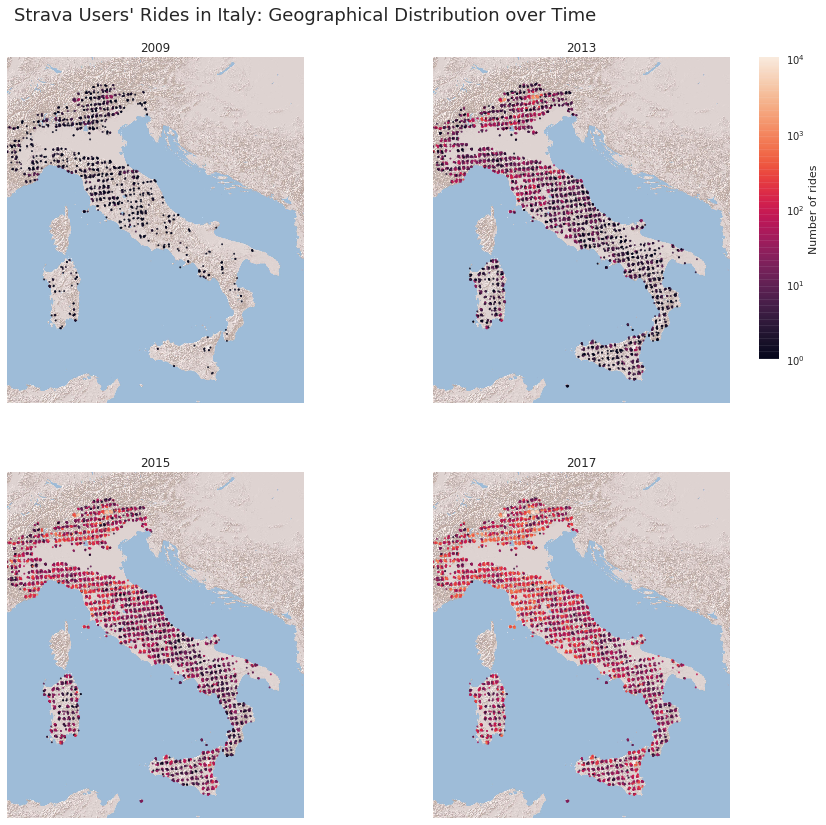

In [22]:
plot_multimap(years=[2009, 2013, 2015, 2017], dataframe=efforts_segments_years)

The chart above shows the geolocated count of segment efforts in four different years taken as reference:

* 2009, selected as the year of the official kickoff of Strava, so that we going to regard efforts' quantities on this year as a sort of baseline for subsequent years.
* 2013, as we can suppose that the availability of gps enabled sport devices was large enough so as to represent no technological barrier to athletes to access online services such as Strava.
* Finally, 2015 and 2017 represent the very recent past allowing to understand what kind of growth in the amateur cyclist community one can expected over a shorter timespan (2 years).

Geolocalization on the map was possible by taking start latitude and longitude of each segment and plotting a dot in the corresponding point in the map.
As we come closer to 2017, we can see that the number of dots increases (do not take color into account for now): that accounts for the effect of new segments added by users that very same year, in other words segments not available previously.
As a consequence, just by looking at the density of dots, we can realized that, while the earlier years 2009 and 2013 witnessed a remarkable growth in the number of segments added to Strava, in 2015 and 2017 the number of new segments reached a "plateau": indeed, looking at 2013 versus 2015 and 2015 versus 2017, it is hard to spot a growth in dots' density.
This effect is with no doubt due also to the fact that once a mountain or hill pass got covered by someone who created a segment and publicly shared it, there is no longer need to create a new segment for it. This also tells us that in the space of few years the whole Italy got completely covered on Strava by one or more segments.

The most interesting data, anyway, lies in the color of dots: lighter ones denote a higher number of efforts made on them in the given year.
Looking at the evolution depicted in the map it is easy to recognize a strongly growing trend that, we think, can be regarded as a good candidate predictor of 
the trend in coming years. Indeed, since technology (gps and Internet enabled bike devices) does not represent anymore a barrier for people to join communities like Strava and, consequently, 
cannot be regarded as a bias on the data, we expect the coming years being revelatory for such a trend and, ultimately, a good reason to further investigate and analyse.

In [23]:
from mpl_toolkits.basemap import Basemap
from matplotlib import colors

sns.set()

def plot_map_year(yr):
    fig = plt.figure(figsize=(7, 7))
    min_max = []
    min_max.append(efforts_segments_years[yr]["count"].min())
    min_max.append(efforts_segments_years[yr]["count"].max())
    min_max = np.array(min_max)
    min_efforts, max_efforts = min_max.min(), min_max.max() 
  
    ax1 = fig.add_subplot(111)
    #ax1.set_title(str(yr))
    m = Basemap(llcrnrlon=6.37,llcrnrlat=36.48333333,urcrnrlon=21.5,urcrnrlat=46.7, epsg=5520)
    m.shadedrelief()
    m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500)
    x, y = m(efforts_segments_years[yr]["s_lng"].values, efforts_segments_years[yr]["s_lat"].values)

    sc = m.scatter(x, y, s=10, c=efforts_segments_years[yr]["count"].values, 
                    norm=colors.LogNorm(vmin=min_efforts, vmax=max_efforts), alpha=0.9, marker=".")

    cbaxes = fig.add_axes([0.9, 0.58, 0.02, 0.3]) 
    cb = fig.colorbar(sc, cax=cbaxes)
    cb.set_label("Number of rides")
    
    plt.suptitle("Strava Users' Rides in Italy: {}".format(yr), fontsize=18, position=(0.5, 0.93))
    plt.show()
        

You can play interactively with the map to show rides' distribution for different years.

In [24]:
from ipywidgets import interact, Select
interact(plot_map_year, yr=Select(options=[y for y in range(2009, 2018)], value=2009, description="Choose Year: "))  

interactive(children=(Select(description='Choose Year: ', options=(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2…

<function __main__.plot_map_year(yr)>

In [25]:
sns.reset_orig()

## Further Analysis: Distribution by Month

Let's analyse now how users' rides are distributed by Month of the Year: the chart below shows the distribution of rides by month over the whole dataset (considering year range 2009-2017).

In [26]:
activities_by_month = activities_filtered.groupby(["Month"])["rank"].count()

In [27]:
activities_by_month

Month
1      43949
2      57077
3     156066
4     276085
5     421428
6     573498
7     701500
8     589924
9     366195
10    186911
11     76424
12     66128
Name: rank, dtype: int64

In [28]:
months_summer = activities_by_month.loc[range(6, 9)]
months_middle = activities_by_month.loc[[5,9]]
months_other = activities_by_month.loc[[1, 2, 3, 4, 10, 11, 12]]

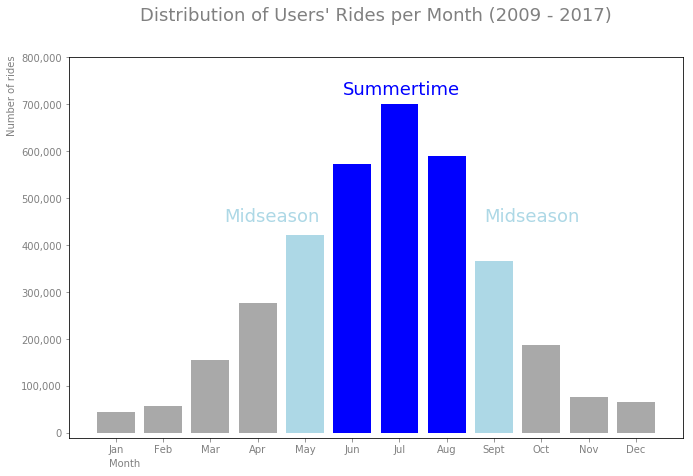

In [29]:
def rides_ticks(x, pos):
    'The two args are the value and tick position'
    if (x == 0):
        return "0"
    if (x % 100000 == 0):
        return "{:4,.0f}".format(x)
    return ""
formatter = ticker.FuncFormatter(rides_ticks)

fig = plt.figure(figsize=(11,7))
ax = plt. axes()
ax.bar(months_other.index.values, months_other.values, color='darkgray')
ax.bar(months_summer.index.values, months_summer.values, color='blue')
ax.bar(months_middle.index.values, months_middle.values, color='lightblue')

ax.text(5.8, 720000, "Summertime", fontsize=18, color="blue")
ax.text(3.3, 450000, "Midseason", fontsize=18, color="lightblue")
ax.text(8.8, 450000, "Midseason", fontsize=18, color="lightblue")

years_range = np.arange(1, 13)
plt.xticks(years_range, ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"))

ax.yaxis.set_major_formatter(formatter)
plt.ylim(-10000, 800000)

plt.title("Distribution of Users' Rides per Month (2009 - 2017)", color="gray", fontsize=18, y=1.08)
ax.set(xlabel="Month", ylabel="Number of rides")

ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.9))
ax.xaxis.label.set_position((0.09, 0))
ax.xaxis.label.set_color('gray')
ax.grid(False)

It is sort of easy to get that most of the rides in Italy occurs during **summertime** (June - August) with a peak in (July). Also, riders seems to be quite active during **late spring** (May) and **early fall**.

This is as well quite understandable as Italy is located in **temperate zone**. It also prove, as we were expecting, that clearly, **climate** *has an influence on riders' habits* so that **future correlations** with **historical weather records** will be key to devise effective predictive models.

## Further Analysis: Distribution by Day of Week

Finally, let's analyse now riders' habit over the week by looking at the fashion rides are distributed among days of week. Again, the chart below shows the distribution of rides by day of week over the whole dataset (considering year range 2009-2017).

In [30]:
activities_by_dow = activities_filtered.groupby(["Dow"])["rank"].count()

In [31]:
dow_weekend = activities_by_dow.loc[[5,6]]
dow_workdays = activities_by_dow.loc[[0, 1, 2, 3, 4]]

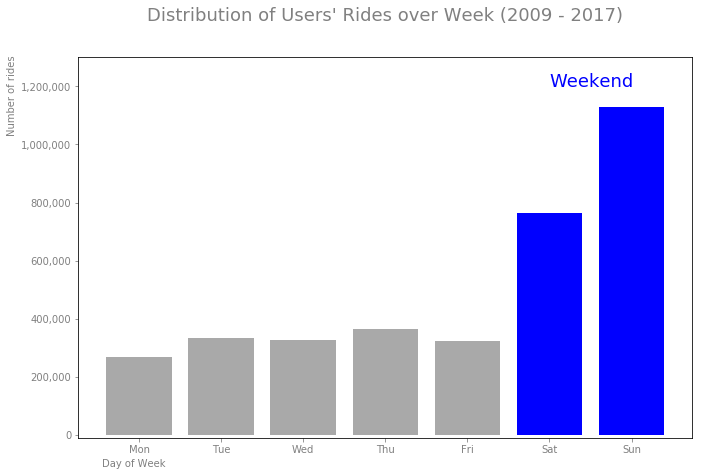

In [32]:
def rides_ticks(x, pos):
    'The two args are the value and tick position'
    if (x == 0):
        return "0"
    if (x % 100000 == 0):
        return "{:4,.0f}".format(x)
    return ""
formatter = ticker.FuncFormatter(rides_ticks)

fig = plt.figure(figsize=(11,7))
ax = plt. axes()
ax.bar(dow_workdays.index.values, dow_workdays.values, color='darkgray')
ax.bar(dow_weekend.index.values, dow_weekend.values, color='blue')

ax.text(5, 1200000, "Weekend", fontsize=18, color="blue")

years_range = np.arange(0, 7)
plt.xticks(years_range, ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))

ax.yaxis.set_major_formatter(formatter)
plt.ylim(-10000, 1300000)

plt.title("Distribution of Users' Rides over Week (2009 - 2017)", color="gray", fontsize=18, y=1.08)
ax.set(xlabel="Day of Week", ylabel="Number of rides")

ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.9))
ax.xaxis.label.set_position((0.09, 0))
ax.xaxis.label.set_color('gray')
ax.grid(False)

Again, it should come as no surprise that most of the **riders** active on Strava **focused their rides in the weekend**, most notably on **Sunday**.

## Further Analysis: Distribution by Grade

Let's analyse now if the severity of a slope affect in any way the number of rides.

In [33]:
activities_by_cat = activities_filtered.groupby(["climb_category"])["rank"].count()

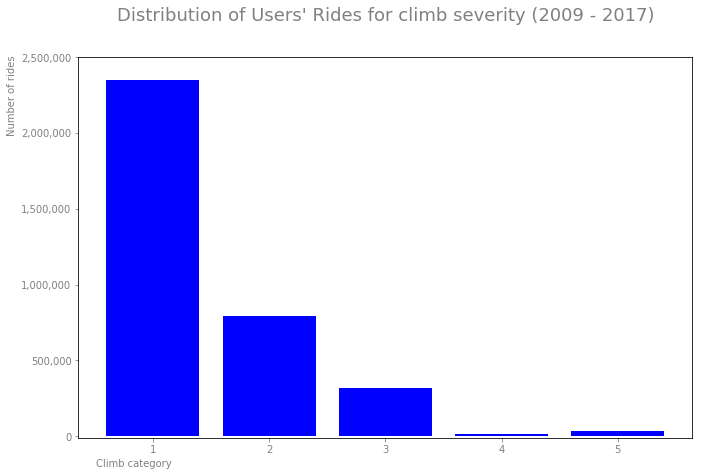

In [34]:
def rides_ticks(x, pos):
    'The two args are the value and tick position'
    if (x == 0):
        return "0"
    if (x % 100000 == 0):
        return "{:4,.0f}".format(x)
    return ""
formatter = ticker.FuncFormatter(rides_ticks)

fig = plt.figure(figsize=(11,7))
ax = plt. axes()
#ax.bar(dow_workdays.index.values, dow_workdays.values, color='darkgray')
ax.bar(activities_by_cat.index.values, activities_by_cat.values, color='blue')

#ax.text(5, 1200000, "Climb category", fontsize=18, color="blue")

years_range = np.arange(1, 6)
plt.xticks(years_range, ("1", "2", "3", "4", "5"))

ax.yaxis.set_major_formatter(formatter)
plt.ylim(-10000, 2500000)

plt.title("Distribution of Users' Rides for climb severity (2009 - 2017)", color="gray", fontsize=18, y=1.08)
ax.set(xlabel="Climb category", ylabel="Number of rides")

ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.9))
ax.xaxis.label.set_position((0.09, 0))
ax.xaxis.label.set_color('gray')
ax.grid(False)

## Further Analysis: Distribution by Number of Nearby Hotels

Let's analyse now how the presence of hotels nearby affects number of rides.

In [35]:
segments_hotels = pd.read_csv("../dataset/segments_italy_FULL_Hotels.csv")

In [36]:
segments_hotels.set_index("Unnamed: 0", inplace=True)

In [37]:
activities_hotel = activities_filtered.merge(segments_hotels, left_on="segment", right_index=True)

In [38]:
bin_range = [a for a in np.arange(1, 210, 15)]

In [39]:
labels = ["[{}, {}]".format(x, y) for x, y in zip(bin_range, bin_range[1:])]

In [40]:
bins = pd.cut(activities_hotel["mean_hotel_distances"], bin_range, labels=labels, retbins=True, right=False)[0].values

In [41]:
activities_hotel["avg_distance_bins"] = bins

In [42]:
activities_by_avg_hotel_distance = activities_hotel.groupby(["avg_distance_bins"])["rank"].count()

In [43]:
activities_by_avg_hotel_distance_cum = activities_by_avg_hotel_distance.cumsum()

In [44]:
activities_by_avg_hotel_distance_cum_near = activities_by_avg_hotel_distance_cum.loc[activities_by_avg_hotel_distance_cum.index <= '[46, 61]']

In [45]:
activities_by_avg_hotel_distance_cum_far = activities_by_avg_hotel_distance_cum.loc[activities_by_avg_hotel_distance_cum.index > '[46, 61]']

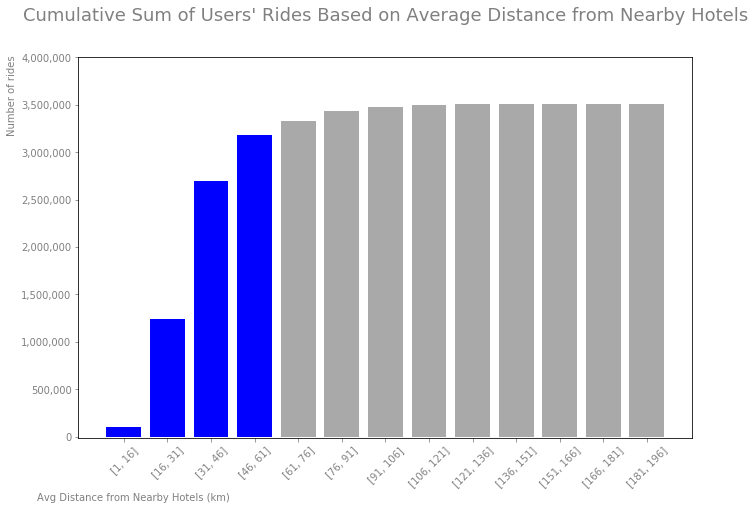

In [46]:
def rides_ticks(x, pos):
    'The two args are the value and tick position'
    if (x == 0):
        return "0"
    if (x % 100000 == 0):
        return "{:4,.0f}".format(x)
    return ""
formatter = ticker.FuncFormatter(rides_ticks)

fig = plt.figure(figsize=(11,7))
ax = plt. axes()
ax.bar(activities_by_avg_hotel_distance_cum_near.index.values, activities_by_avg_hotel_distance_cum_near.values, color='blue')
ax.bar(activities_by_avg_hotel_distance_cum_far.index.values, activities_by_avg_hotel_distance_cum_far.values, color='darkgrey')

#ax.text(5, 1200000, "Climb category", fontsize=18, color="blue")

years_range = np.arange(1, 10)
#plt.xticks(years_range, ("1", "2", "3", "4", "5"))
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(formatter)
plt.ylim(-10000, 4000000)

plt.title("Cumulative Sum of Users' Rides Based on Average Distance from Nearby Hotels", color="gray", fontsize=18, y=1.08)
ax.set(xlabel="Avg Distance from Nearby Hotels (km)", ylabel="Number of rides")

ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.9))
ax.xaxis.label.set_position((0.09, 0))
ax.xaxis.label.set_color('gray')
ax.grid(False)

In [47]:
activities_by_avg_hotel_distance_gray_start = activities_by_avg_hotel_distance.loc[['[1, 16]']]

In [48]:
activities_by_avg_hotel_distance_gray_end= activities_by_avg_hotel_distance.loc[['[61, 76]', '[61, 76]', '[76, 91]', '[91, 106]', '[106, 121]']]

In [49]:
activities_by_avg_hotel_distance_blue = activities_by_avg_hotel_distance.loc[['[16, 31]',  '[31, 46]',  '[46, 61]']]

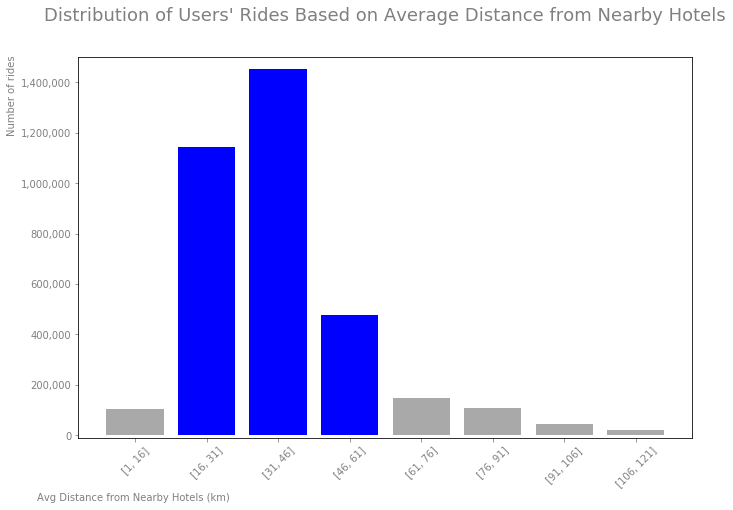

In [50]:
def rides_ticks(x, pos):
    'The two args are the value and tick position'
    if (x == 0):
        return "0"
    if (x % 100000 == 0):
        return "{:4,.0f}".format(x)
    return ""
formatter = ticker.FuncFormatter(rides_ticks)

fig = plt.figure(figsize=(11,7))
ax = plt. axes()
ax.bar(activities_by_avg_hotel_distance_gray_start.index.values, activities_by_avg_hotel_distance_gray_start.values, color='darkgrey')
ax.bar(activities_by_avg_hotel_distance_blue.index.values, activities_by_avg_hotel_distance_blue.values, color='blue')
ax.bar(activities_by_avg_hotel_distance_gray_end.index.values, activities_by_avg_hotel_distance_gray_end.values, color='darkgrey')


#ax.text(5, 1200000, "Climb category", fontsize=18, color="blue")

years_range = np.arange(1, 10)
#plt.xticks(years_range, ("1", "2", "3", "4", "5"))
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(formatter)
plt.ylim(-10000, 1500000)

plt.title("Distribution of Users' Rides Based on Average Distance from Nearby Hotels", color="gray", fontsize=18, y=1.08)
ax.set(xlabel="Avg Distance from Nearby Hotels (km)", ylabel="Number of rides")

ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.9))
ax.xaxis.label.set_position((0.09, 0))
ax.xaxis.label.set_color('gray')
ax.grid(False)

## Dataset: rides per segment

Let's now produce a dataset with the tot. number of rides per segments over 2009-2017

In [51]:
## Further Analysis: Distribution by Number of Nearby Hotels

Let's analyse now how the presence of hotels nearby affects number of rides.

SyntaxError: EOL while scanning string literal (<ipython-input-51-7b463f5a49d3>, line 3)

In [ ]:
activities_per_segment = activities_hotel.groupby("segment")["rank"].count()

In [ ]:
segments_hotels["num_trainings"] = activities_per_segment

In [ ]:
segments_hotels.to_csv(path_or_buf="training_sessions_italy_FINAL.csv")

## Preliminary Machine Learning

In [18]:
training_sessions = pd.read_csv("strava_segments_italy_DEF.csv", index_col="segment")

In [21]:
training_sessions = training_sessions.drop(columns=['Unnamed: 0'], axis=1)

In [33]:
training_sessions.head()

,avg_grade,climb_category,climb_category_desc,distance,elev_difference,name,points,resource_state,starred,s_lat,...,country_code,loc_name,efforts_log,hotel_distances,mean_hotel_distances,std_hotel_distances,median_hotel_distances,25_hotel_distances,75_hotel_distances,num_trainings
segment,,,,,,,,,,,,,,,,,,,,,
9802256,5.0,2,3,5047.5,253.6,salita di nikkà completa - dal mare alla chies...,{_h_Fg|chANIJOPy@Is@pEeHz@sA^e@R_@Lg@R}ALYl@a@...,2,False,36.746387,...,it,Pantelleria,1.812913,2,184.979043,44.221978,171.970419,10.216957,64.830073,65
8836676,4.3,1,4,2616.8,113.4,Bivio Rekale/Madonna dietro Isola,_pg_Fo|fhAfH{Ad@O^W^_@Vg@`CiHRm@Ve@t@w@xDeDl@Y...,2,False,36.743841,...,it,Pantelleria,1.908485,2,184.241666,43.945298,171.711705,11.077750,65.169775,81
9744834,6.4,2,3,2728.4,175.2,salita di ghirlanda,scm_FoxlhAPLT\Jj@Dz@BNDNLPJHTHd@@d@Ud@g@JGRCZD...,2,False,36.772586,...,it,Pantelleria,1.724276,2,181.235141,43.390608,167.751726,10.359489,62.890389,53
4264640,14.8,1,4,620.2,91.9,Via Preda Climb,chg_Fk{dhAbA_CfAoCvC}IVe@v@kAXg@hAmCrAoDf@kA,2,False,36.742584,...,it,Pantelleria,1.838849,2,184.879990,44.134305,172.191740,10.782773,65.238046,69
4264641,9.7,1,4,1233.3,120.1,Via Preda Climb,mjf_F{vfhABWAOIUIKy@o@KEYCUNo@pAWd@YTMBiAb@WDa...,2,False,36.737837,...,it,Pantelleria,1.826075,2,184.575950,43.967203,172.359573,11.627304,65.771198,67


In [34]:
training_sessions.to_csv(path_or_buf="../dataset/strava_segments_italy_DEF.csv")

In [23]:
training_sessions.columns

Index(['avg_grade', 'climb_category', 'climb_category_desc', 'distance',
       'elev_difference', 'name', 'points', 'resource_state', 'starred',
       's_lat', 's_lng', 'e_lat', 'e_lng', 'country_code', 'loc_name',
       'efforts_log', 'hotel_distances', 'mean_hotel_distances',
       'std_hotel_distances', 'median_hotel_distances', '25_hotel_distances',
       '75_hotel_distances', 'num_trainings'],
      dtype='object')

In [24]:
activities_filtered.columns

NameError: name 'activities_filtered' is not defined

In [59]:
all_trainings_grouped = activities_filtered.groupby(["segment", "Dow", "Month"])["rank"].count()

In [60]:
grouped = all_trainings_grouped

In [61]:
grouped = grouped.reset_index()

In [62]:
grouped.rename(columns={"rank": "total_trainings"}, inplace=True)

In [63]:
training_sessions.head(1)

,segment,avg_grade,climb_category,climb_category_desc,distance,elev_difference,name,points,resource_state,starred,...,loc_name,efforts,efforts_log,hotel_distances,mean_hotel_distances,std_hotel_distances,median_hotel_distances,25_hotel_distances,75_hotel_distances,num_trainings
0,9802256,5.0,2,3,5047.5,253.6,salita di nikkà completa - dal mare alla chies...,{_h_Fg|chANIJOPy@Is@pEeHz@sA^e@R_@Lg@R}ALYl@a@...,2,False,...,Pantelleria,65,1.812913,2,184.979043,44.221978,171.970419,10.216957,64.830073,65


In [64]:
training_complete = grouped.merge(training_sessions, left_on="segment", right_on="segment")

In [65]:
training_complete.columns

Index(['segment', 'Dow', 'Month', 'total_trainings', 'avg_grade',
       'climb_category', 'climb_category_desc', 'distance', 'elev_difference',
       'name', 'points', 'resource_state', 'starred', 's_lat', 's_lng',
       'e_lat', 'e_lng', 'country_code', 'loc_name', 'efforts', 'efforts_log',
       'hotel_distances', 'mean_hotel_distances', 'std_hotel_distances',
       'median_hotel_distances', '25_hotel_distances', '75_hotel_distances',
       'num_trainings'],
      dtype='object')

In [66]:
training_complete.head(10)["starred"]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: starred, dtype: bool

In [67]:
training_complete["Month"].value_counts() / len(training_complete)

8     0.117396
7     0.108534
6     0.105422
9     0.101187
5     0.100874
4     0.091806
10    0.087364
3     0.072499
11    0.062425
12    0.059914
2     0.049992
1     0.042588
Name: Month, dtype: float64

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit

In [69]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [70]:
for train_i, test_i in split.split(training_complete, training_complete["Month"]):
    train = training_complete.loc[train_i]
    test = training_complete.loc[test_i]

In [71]:
corr_matrix = train.corr()

In [72]:
corr_matrix["total_trainings"].sort_values(ascending=False)

total_trainings           1.000000
num_trainings             0.343841
efforts                   0.343841
efforts_log               0.201147
s_lat                     0.083451
e_lat                     0.083443
hotel_distances           0.082292
Dow                       0.056171
avg_grade                 0.015292
climb_category            0.004711
elev_difference           0.004258
Month                    -0.000604
distance                 -0.007335
segment                  -0.025828
e_lng                    -0.036018
s_lng                    -0.036052
std_hotel_distances      -0.049500
25_hotel_distances       -0.058717
75_hotel_distances       -0.060078
median_hotel_distances   -0.068384
mean_hotel_distances     -0.070855
resource_state                 NaN
starred                        NaN
Name: total_trainings, dtype: float64

In [73]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62b3a070f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f62b3930d30>]], dtype=object)

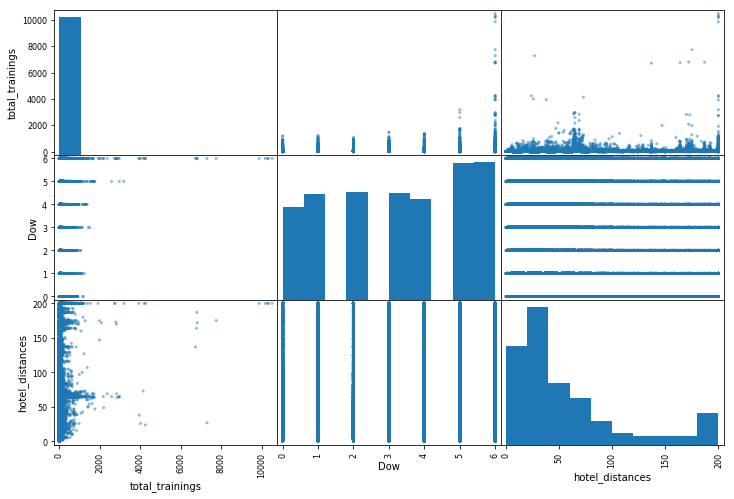

In [74]:
scatter_matrix(train[['total_trainings', 'Dow', 'hotel_distances']], figsize=(12,8))

In [75]:
X_train = train[['Dow', 'Month', 'starred', 's_lat', 's_lng',
       'hotel_distances', 'mean_hotel_distances', 'std_hotel_distances',
       'median_hotel_distances', '25_hotel_distances', '75_hotel_distances']]
y_train = train["total_trainings"]

In [76]:
X_test = test[['Dow', 'Month', 'starred', 's_lat', 's_lng',
       'hotel_distances', 'mean_hotel_distances', 'std_hotel_distances',
       'median_hotel_distances', '25_hotel_distances', '75_hotel_distances']]
y_test = test["total_trainings"]

In [64]:
X_train["Month"].value_counts() / len(X_train)

8     0.117393
7     0.108534
6     0.105422
9     0.101186
5     0.100875
4     0.091807
10    0.087366
3     0.072501
11    0.062424
12    0.059912
2     0.049991
1     0.042589
Name: Month, dtype: float64

In [65]:
X_train.hotel_distances.describe()

count    224962.000000
mean         57.376984
std          53.545060
min           0.000000
25%          21.000000
50%          36.000000
75%          72.000000
max         200.000000
Name: hotel_distances, dtype: float64

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge

In [78]:
from sklearn import base

class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  # We will need these in transform()
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
        return X[self.col_names].values
        #print(self.df[self.col_names].values.shape)
        #return self.df[self.col_names].values.flatten().tolist()

In [68]:
pipe_cat = Pipeline([
    ("col", ColumnSelectTransformer(['Dow', 'Month'])),
    ("enc", OneHotEncoder())
])

In [69]:
pipe_num = Pipeline([
    ("col", ColumnSelectTransformer(['s_lat', 's_lng', 'hotel_distances'])),
    ("std", StandardScaler())
])

In [70]:
union = FeatureUnion([
        ("cat", pipe_cat),
        ("num", pipe_num)
    ])

In [ ]:
res = union.fit_transform(X_train)

In [ ]:
final_pipe = Pipeline([
    ("union", union),
    ("reg", Ridge() )
])

In [ ]:
final_pipe.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(final_pipe, param_grid={'reg__alpha': [0.001], "reg__max_iter": [100, 500, 1000]}, verbose=3)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_.get_params()

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_train)

In [ ]:
import sklearn.metrics as metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_train, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_train, y_pred))
print("R^2:", metrics.r2_score(y_train, y_pred))

In [ ]:
plt.scatter(range(0, 100), y_train[0:100])
plt.plot(range(0, 100), y_pred[0:100], "g")

In [82]:
import numpy as np
from scipy.sparse import lil_matrix

class ResidualEstimator(base.BaseEstimator, base.RegressorMixin):
    
    def __init__(self, est_1, est_2):
        self.est_1 = est_1
        self.est_2 = est_2
    
    def fit(self, X, y):
        self.est_1.fit(lil_matrix(X), y)
        self.est_2.fit(lil_matrix(X), y - self.est_1.predict(X))
        return self
    
    def predict(self, X):
        p_1 = self.est_1.predict(X)
        pred = self.est_2.predict(X)
        return np.array(p_1 + pred)

In [73]:
import sklearn.neighbors as neighbors
from sklearn.ensemble import RandomForestRegressor
pipe_attr = Pipeline([
        ('union', union),
        ('residuals', ResidualEstimator(Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=500, normalize=False, random_state=None, solver='sag', tol=0.001), 
                                        RandomForestRegressor()))
    ])

In [ ]:
pipe_attr.get_params()

In [ ]:
grid_search = GridSearchCV(pipe_attr, param_grid={'residuals__est_2__max_features': [0.5, 0.6], 'residuals__est_2__n_estimators': [100]}, verbose=3)

In [ ]:
grid_search.fit(X_train[:60000], y_train[:60000])

In [ ]:
grid_search.best_estimator_.get_params()

In [74]:
pipe_attr = Pipeline([
        ('union', union),
        ('residuals', ResidualEstimator(Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=500, normalize=False, random_state=None, solver='sag', tol=0.001), 
                                        RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False)))
    ])

In [75]:
pipe_attr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('cat', Pipeline(memory=None,
     steps=[('col', ColumnSelectTransformer(col_names=['Dow', 'Month'])), ('enc', OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sp...mators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)))])

In [79]:
from sklearn.externals import joblib

In [80]:
joblib.dump(pipe_attr, 'combined_estimator.pkl')

['combined_estimator.pkl']

In [83]:
pipe_attr = joblib.load('combined_estimator.pkl')

In [81]:
y_pred = pipe_attr.predict(X_train)

In [86]:
import sklearn.metrics as metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_train, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_train, y_pred))
print("R^2:", metrics.r2_score(y_train, y_pred))

NameError: name 'y_pred' is not defined

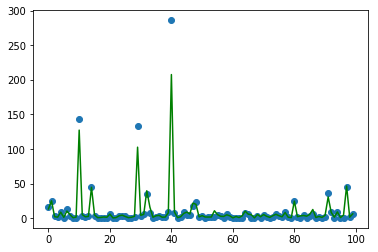

In [84]:
plt.scatter(range(0, 100), y_train[0:100])
plt.plot(range(0, 100), y_pred[0:100], "g")

In [87]:
y_pred_test = pipe_attr.predict(X_test)

In [88]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_test))
print("R^2:", metrics.r2_score(y_test, y_pred_test))

Mean Absolute Error: 6.42148097938
Mean Squared Error: 2637.41895008
R^2: 0.458751721213


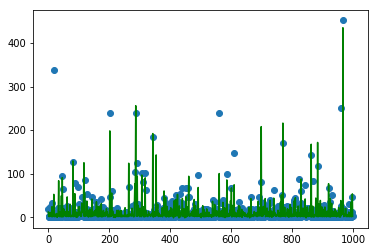

In [89]:
plt.scatter(range(0, 1000), y_test[0:1000])
plt.plot(range(0, 1000), y_pred_test[0:1000], "g")

In [96]:
important_features = pipe_attr.get_params()['residuals'].est_2.feature_importances_

In [113]:
cat_features = pipe_attr.get_params()['union'].get_params('cat')["cat__enc"].active_features_

In [117]:
num_cols = ['s_lat', 's_lng', 'hotel_distances']

In [122]:
attr = cat_features.tolist() + num_cols

In [125]:
attr

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 's_lat',
 's_lng',
 'hotel_distances']

In [124]:
sorted(zip(important_features, attr), reverse=True)

[(0.28725182972048374, 's_lng'),
 (0.22874745066070765, 's_lat'),
 (0.16008237306702688, 6),
 (0.11723047698277002, 'hotel_distances'),
 (0.076446175626865523, 14),
 (0.03813739086839512, 13),
 (0.02005997620150958, 15),
 (0.015734256108299354, 12),
 (0.014471775081229399, 5),
 (0.0087992493786392522, 16),
 (0.0047676216505600083, 17),
 (0.0042764640637098054, 11),
 (0.00424324795955415, 1),
 (0.0042412135680498448, 4),
 (0.0041845040009093814, 2),
 (0.0033994896318906907, 10),
 (0.0029114399387457877, 0),
 (0.0023382823541239894, 3),
 (0.00081717776710467979, 19),
 (0.00064342148894401627, 18),
 (0.00063373379863041802, 8),
 (0.00058245008185074513, 9)]